## Basemap ##

In [49]:
# youtube: https://www.youtube.com/watch?v=E6gvtfQHJUs
# http://matplotlib.org/basemap/users/index.html
%matplotlib inline

In [50]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

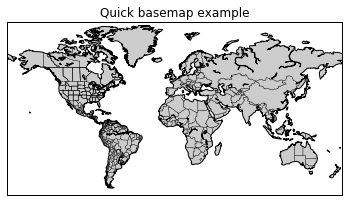

In [53]:
m = Basemap(projection='mill',
            llcrnrlat=-60,
            urcrnrlat=85,
            llcrnrlon=-180,
            urcrnrlon=180,
            resolution='c'
           )
m.drawcoastlines()
# m.fillcontinents()
m.drawmapboundary(fill_color="#FFFFFF")
m.drawstates()
m.drawcountries()

m.fillcontinents()
m.drawmapboundary()
#m.bluemarble()

plt.title('Quick basemap example')
plt.show()

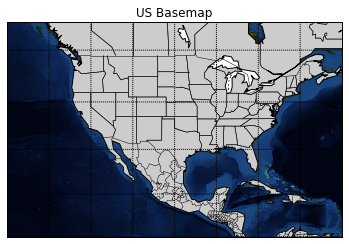

In [57]:
us = Basemap(projection='mill',
            llcrnrlat=10,
            urcrnrlat=55,
            llcrnrlon=-140,
            urcrnrlon=-60,
            resolution='c' # ['c','l','i','h','f']
           )
us.drawcoastlines()
#us.fillcontinents(color='#EEEEBB', lake_color='#0022EE')
#us.drawmapboundary(fill_color='cyan')
us.drawparallels(np.arange(10, 55, 10))
us.drawmeridians(np.arange(-140, -60, 10))

us.drawstates()
us.drawcountries()

us.fillcontinents()
us.drawmapboundary()
us.bluemarble()

plt.title('US Basemap')
plt.show()

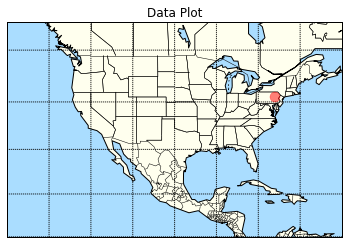

In [80]:
us = Basemap(projection='mill',
            llcrnrlat=10,
            urcrnrlat=55,
            llcrnrlon=-140,
            urcrnrlon=-60,
            resolution='c' # ['c','l','i','h','f']
           )
us.drawcoastlines()
us.fillcontinents(color='#FFFFEE', lake_color='#AADDFF')
us.drawmapboundary(fill_color='#AADDFF')
us.drawparallels(np.arange(10, 55, 10))
us.drawmeridians(np.arange(-140, -60, 10))

us.drawstates()
us.drawcountries()

lat, lon = 41, -76
x, y = us(lon, lat)
us.plot(x, y, 'r.', markersize=20, alpha=.5)

plt.title("Data Plot")
plt.show()

## Vincent ##

In [8]:
# http://vincent.readthedocs.org/en/latest/quickstart.html
# Tutorial: http://wrobstory.github.io/2013/10/mapping-data-python.html

import vincent
vincent.core.initialize_notebook()

In [9]:
import random
list_data = [random.random() for _ in range(10)]
bar = vincent.Bar(list_data)
bar.display()


In [18]:
# import vincent
from vincent import AxisProperties, PropertySet, ValueRef

bar = vincent.Bar(list_data)
bar.axis_titles(x='Index', y='Value')

# rotate x axis
ax = AxisProperties(
        labels = PropertySet(angle=ValueRef(value=90)))
bar.axes[0].properties = ax

bar.display()

In [26]:
import requests
import json

r = requests.get('https://raw.githubusercontent.com/wrobstory/vincent_map_data/master/us_counties.topo.json')
countries_json = r.json()
#json.dumps(countries_json)

In [25]:
topo_url_base = 'https://raw.githubusercontent.com/wrobstory/vincent_map_data/master/'
world_topo = r'world-countries.topo.json'
geo_data = [{'name': 'countries',
             'url': topo_url_base+world_topo,
             'feature': 'world-countries'}]

vis = vincent.Map(geo_data=geo_data, scale=200)
vis.display()

In [30]:
topo_url_base = 'https://raw.githubusercontent.com/wrobstory/vincent_map_data/master/'

county_topo = r'us_counties.topo.json'
state_topo = r'us_states.topo.json'

geo_data = [{'name': 'counties',
             'url':  topo_url_base+county_topo,
             'feature': 'us_counties.geo'},
            {'name': 'states',
             'url':  topo_url_base+state_topo,
             'feature': 'us_states.geo'}]

vis = vincent.Map(geo_data=geo_data, scale=1000, projection='albersUsa')
del vis.marks[1].properties.update
vis.marks[0].properties.update.fill.value = '#084081'
vis.marks[1].properties.enter.stroke.value = '#fff'
vis.marks[0].properties.enter.stroke.value = '#7bccc4'

vis.display()

In [ ]:
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

vis = vincent.Map(data=merged, geo_data=geo_data, scale=1100, projection='albersUsa',
          data_bind='Employed_2011', data_key='FIPS',
          map_key={'counties': 'properties.FIPS'})
vis.marks[0].properties.enter.stroke_opacity = ValueRef(value=0.5)
vis.to_json('vega.json')